In [1]:
import numpy as np
from ddqn_agent import DDQNAgent
from util import make_env, plot_learning_curve
import os

C:\Users\Omkar\anaconda3\envs\RL\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0
episode  0 score:  -2.0 avg_score: -2.0 best_score -inf epsilon 1.00 steps  100
1
episode  1 score:  -2.0 avg_score: -2.0 best_score -2.0 epsilon 1.00 steps  200
2
episode  2 score:  -2.0 avg_score: -2.0 best_score -2.0 epsilon 1.00 steps  300
3
episode  3 score:  -2.0 avg_score: -2.0 best_score -2.0 epsilon 1.00 steps  400
4
episode  4 score:  -2.0 avg_score: -2.0 best_score -2.0 epsilon 1.00 steps  500


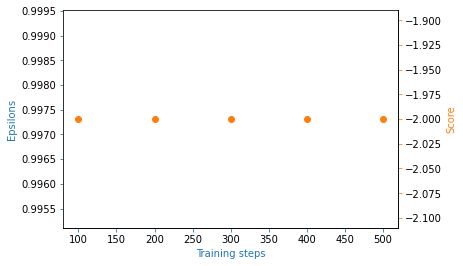

In [7]:
if __name__ == '__main__':
    env = make_env('PongNoFrameskip-v4')
    best_score = -np.inf
    load_checkpoint = False
    n_games = 5
    
    if(not os.path.exists('models')):
        os.mkdir('models/')
    if(not os.path.exists('plots')):
        os.mkdir('plots/')
        
    
    agent = DDQNAgent(gamma = 0.99, epsilon= 1.0, lr = 0.00001, input_dims=(env.observation_space.shape),
                        n_actions= env.action_space.n, mem_size= 5000, eps_min = 0.1,
                        batch_size = 32, replace = 1000, eps_dec = 1e-5, chkpt_dir1='models/', algo = 'DDQNAgent',
                        env_name = 'PongNoFrameskip-v4')

    if load_checkpoint:
        agent.load_models()

    fname = agent.algo + '_' + agent.env_name +'_lr'+ str(agent.lr) + '_' + str(n_games)+'games'

    figure_file = 'plots/' + fname + '.png'

    n_steps = 0
    scores, eps_history, steps_array = [], [], []

    for i in range(n_games):
        done = False
        score = 0
        observation = env.reset()

        while not done or n_steps==20:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward

            if not load_checkpoint:
                agent.store_transition(observation, action, reward, observation_, int(done))
                agent.learn()
            observation = observation_
            n_steps += 1
            # if(n_steps%100 == 0):
            #     break

        steps_array.append(n_steps)
        scores.append(score)
        avg_score = np.mean(scores[-100:])

        print('episode ', i, 'score: ', score, 'avg_score: %.1f best_score %.1f epsilon %.2f' %
        (avg_score, best_score, agent.epsilon), 'steps ', n_steps)

        # if avg_score > best_score:
        #     if not load_checkpoint:
        #         agent.save_models()

        best_score = avg_score

        if score > best_score:
          if not load_checkpoint:
                agent.save_models()
          best_score = score 

        eps_history.append(agent.epsilon)

    plot_learning_curve(steps_array, scores, eps_history, figure_file)